# **AE6102-A6**
---
1. *CPU Specifcations:*
```bash
   !lscpu | grep -e 'Model name' -e 'Thread(s) per core' -e 'Core(s) per socket' -e 'Socket(s)' -e 'MHz'
    Model Name:                         Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
    Processor Speed:                    1.60 GHz
    Maximum Speed:                      3.90 GHz (3900.0 MHz)
    Minimum Speed:                      0.40 GHz (400.0 MHz)
    Number of Physical Cores:           4
```
2.*Cache Size:*
```
    L1 Cache(Instruction):                 128 KiB (4 instances)
    L1 Cache(Data):                        128 KiB (4 instances)
    L2 Cache:                              1 MiB (4 instances)
    L3 Cache:                              6 MiB (1 instance)
    # Each core has one L1-D, L1-I, L2 cache.
    # all 4 cores share L3 cache
```
3.*Online Specification - Intel® Core™ i5-8265U Processor (6M Cache, up to 3.90 GHz) - Intel*
```
    Model Name:                       Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz
    Max memory bandwidth:             37.5 GB/s
    GFLOPS:                           102.4
```
4.*motherboard's bus frequency*
```bash
!sudo dmidecode --type memory | less
    Speed:                   2400 MT/s (Megatransfers per second)
```
5.*References (Online Specification)*:

    *   https://ark.intel.com/content/www/us/en/ark/products/149088/intel-core-i58265u-processor-6m-cache-up-to-3-90-ghz.html
    *   https://www.intel.com/content/dam/support/us/en/documents/processors/APP-for-Intel-Core-Processors.pdf



In [ ]:
!pip3 install numba numpy matplotlib

#### Memory Bandwidth vs N
*Graph Generated on my machine*

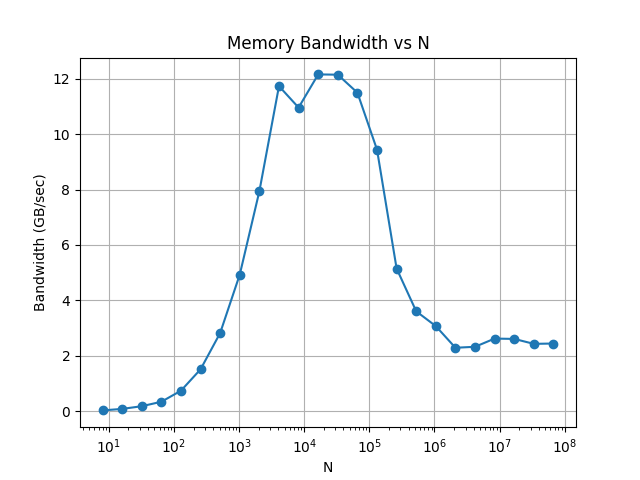
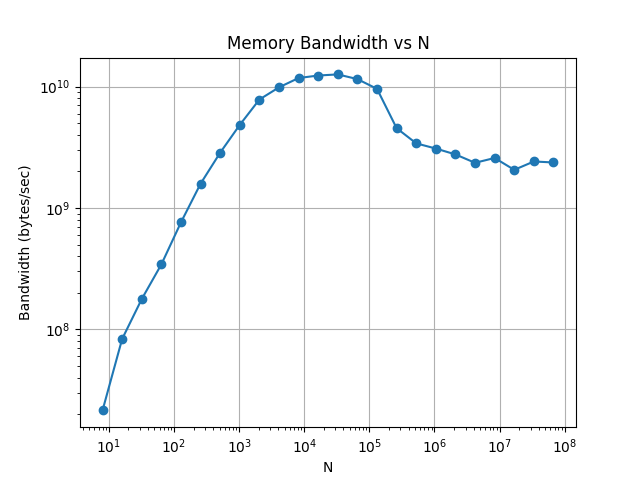


In [ ]:
import numpy as np
from numba import njit
import time
import matplotlib.pyplot as plt

In [ ]:
def make_data(n):
    x = np.linspace(0, 2*np.pi, n)
    a, b = np.random.random((2, n))
    y = np.zeros_like(x)
    return y, x, a, b

In [ ]:
@njit
def axpb(y, x, a, b):
    for i in range(y.shape[0]):
        y[i] = a[i]*x[i] + b[i]

In [ ]:
# warmup jit
y, x, a, b = make_data(1000)
axpb(y, x, a, b)
# benchmark
lst = [pow(2, i) for i in range(3, 27)]
bandwidth_list = []
for n in lst:
    y, x, a, b = make_data(n)
    s = time.perf_counter()
    axpb(y, x, a, b)
    e = time.perf_counter()
    elapsed = e - s
    bandwidth = ((n * 8) / elapsed)/1e9
    bandwidth_list.append(bandwidth)

plt.plot(lst, bandwidth_list, 'o-')
plt.xscale('log')
plt.title('Memory Bandwidth vs N')
plt.xlabel('N')
plt.ylabel('Bandwidth (gega bytes/sec)')
plt.grid()
plt.show()

##### GFLOPS vs N
*Graph generated on my machine*

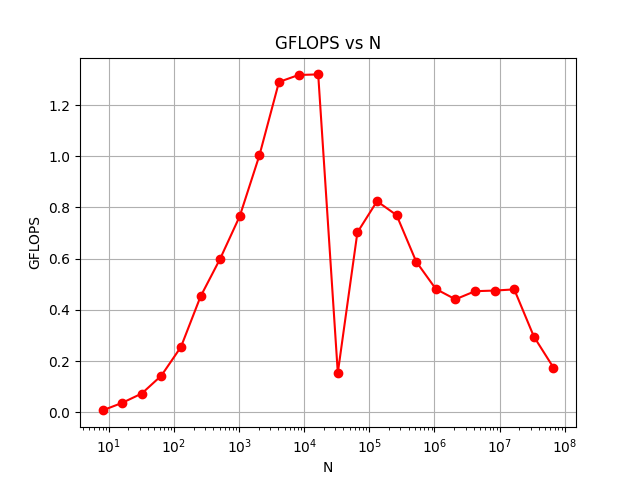

In [ ]:
def gflops_count(N):
    a = np.random.rand(N).astype(np.float64)
    b = np.random.rand(N).astype(np.float64)
    x = np.random.rand(N).astype(np.float64)
    y = np.empty(N, dtype=np.float64)
    start_time = time.perf_counter()
    y = ((a*a + x*x + b*b - y) + ((b*x + a)*(x + b)*(b - a)*(a - x)))*(a*x + b)*(a + b)*(a - b)*(b - x)
    end_time =  time.perf_counter()
    time_taken = end_time - start_time
    # 24 flops per loop * N loops 
    gflops = ((24 * N) / time_taken) / 1e9 
    return gflops

In [ ]:
lst = [pow(2, i) for i in range(3, 27)]
gflops_list = [gflops_count(N) for N in lst]
plt.plot(lst, gflops_list, 'o-', color='r')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('GFLOPS')
plt.title('GFLOPS vs N')
plt.grid()
plt.show()